In [1]:
# Standard libraries
import numpy as np
import json
from datetime import datetime

# Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_provider import IBMProvider

# Own library
from quantum_gates.simulators import MrAndersonSimulator
from quantum_gates.gates import standard_gates
from quantum_gates.circuits import EfficientCircuit, AlternativeCircuit, Circuit
from quantum_gates.utilities import DeviceParameters
from quantum_gates.utilities import setup_backend




In [2]:

IBM_TOKEN = "content"

In [3]:
provider = IBMProvider(token=IBM_TOKEN)
backend = provider.get_backend('ibm_brisbane')
prop = backend.properties()

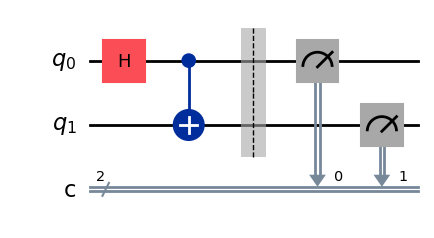

In [5]:
N_QUBIT = 2
N_BIT = 2

circ = QuantumCircuit(N_QUBIT,N_BIT)

"""
circ.rz(np.pi/2, 1)
circ.rz(-np.pi/2, 0)

circ.sx(0)
circ.sx(1)

circ.rz(np.pi/2, 0)
circ.rz(-np.pi/2, 1)

circ.ecr(1,0)


circ.rz(np.pi/2,1)
circ.rz(np.pi/2,0)

circ.sx(0)
circ.sx(1)

circ.rz(np.pi/2,1)
circ.rz(np.pi/2,0)
"""

#circ.ecr(0,1)

circ.h(0)
circ.cx(0,1)







circ.barrier(range(N_QUBIT))
circ.measure(range(N_QUBIT),range(N_QUBIT))
circ.draw('mpl')

In [6]:
config = {
    "backend": {
        "hub": "ibm-q",
        "group": "open",
        "project": "main",
        "device_name": "ibmq_manila"
    },
    "run": {
        "shots": 1000,
        "qubits_layout": [0,1,2,3],
        #"psi0": [1, 0, 0, 0]
        "psi0": [1, 0, 0, 0]
    }
}



run_config = config["run"]
#qubits_layout = run_config["qubits_layout"]
qubits_layout = list(range(N_QUBIT))
print(qubits_layout)

device_param = DeviceParameters(qubits_layout)
device_param.load_from_backend(backend)
device_param_lookup = device_param.__dict__()

[0, 1]


In [7]:
sim = MrAndersonSimulator(gates=standard_gates, CircuitClass=EfficientCircuit)

t_circ = transpile(
    circ,
    backend,
    scheduling_method='asap',
    initial_layout=qubits_layout,
    seed_transpiler=42
)

#t_circ.draw(output='mpl')

In [8]:
psi0 = [1] + [0] * (2**N_QUBIT-1)

probs = sim.run(
    t_qiskit_circ=t_circ, 
    qubits_layout=qubits_layout, 
    psi0=np.array(psi0), 
    shots=run_config["shots"], 
    device_param=device_param_lookup,
    nqubit=N_QUBIT)

counts_ng = {format(i, 'b').zfill(2): probs[i] for i in range(0, 2**N_QUBIT)}

plot_histogram(counts_ng, bar_labels=False, legend=['Noisy Gates simulation'])

We only support a linear connectivity at the moment.


AttributeError: 'EfficientCircuit' object has no attribute 'ECR_inv'

In [9]:
n_rz, swap_detector, data = sim._preprocess_circuit(t_circ, qubits_layout, N_QUBIT)

In [12]:
data[5][1][0]._index

1

In [22]:
t_ecr = device_param_lookup['t_ecr']

q_ctr = data[16][1][0]._index # index control qubit
q_trg = data[16][1][1]._index # index target qubit

print(q_ctr, q_trg)



2 1


In [23]:
t_ecr[q_ctr,q_trg]

6.6e-07

In [9]:
prob = sim._perform_simulation(1000, data, n_rz, N_QUBIT, device_param_lookup, [1, 0, 0, 0])


In [10]:
prob

array([0.01514261, 0.01569444, 0.48414744, 0.48334333])

In [19]:
reordered_probs = sim._fix_probabilities(prob, swap_detector, N_QUBIT)

In [20]:
reordered_probs

[0.026954947331260068,
 0.4709612069681226,
 0.4770180932504227,
 0.026110633011811123]

In [22]:
_apply_gates_on_circuit(data, circ = t_circ, device_param=device_param_lookup)

AttributeError: 'QuantumCircuit' object has no attribute 'nqubit'